Descriptive Statistics:
       Effectiveness   Duration  Inquisitiveness  Learning_Approach
count      43.000000  43.000000        42.000000          42.000000
mean       78.057143  18.976190        11.500000           6.952381
std        12.724950   5.914019         1.626758           1.513394
min        52.400000   9.000000         8.000000           3.000000
25%        66.800000  15.000000        11.000000           6.000000
50%        78.057143  20.000000        11.500000           7.000000
75%        88.400000  23.000000        12.000000           8.000000
max       100.000000  30.000000        15.000000          10.000000

Correlation Matrix:
                   Effectiveness  Duration  Inquisitiveness  Learning_Approach
Effectiveness           1.000000 -0.094264        -0.092200           0.298963
Duration               -0.094264  1.000000        -0.011272           0.104878
Inquisitiveness        -0.092200 -0.011272         1.000000           0.069349
Learning_Approach       0.2

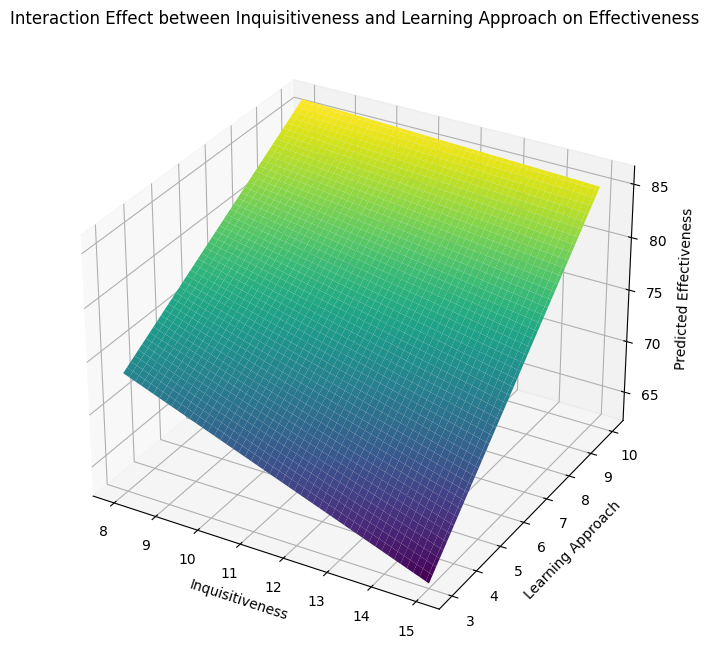

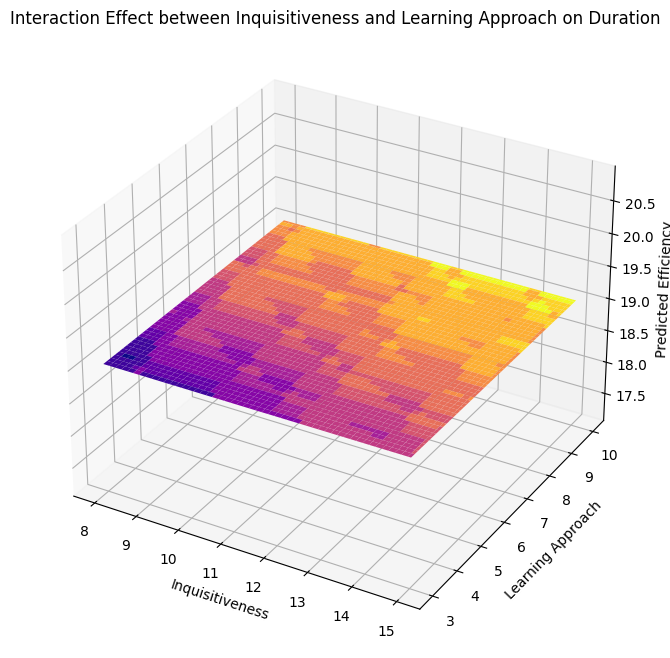

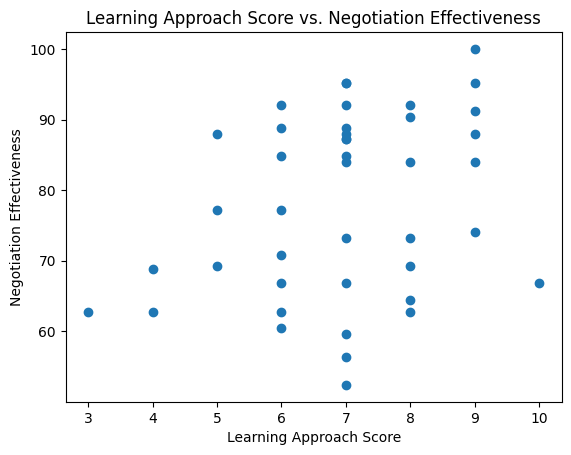

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
file_path = './data.csv'
data = pd.read_csv(file_path, delimiter=',')

# Renaming columns for simplicity
data.columns = ['Candidate_ID', 'Recruiter_ID', 'Role', 'Age', 'Gender', 'Satisfaction',
                'Duration', 'Total_Score', 'Effectiveness', 'Inquisitiveness', 'Learning_Approach']

# Calculate descriptive statistics
descriptive_stats = data[['Effectiveness', 'Duration', 'Inquisitiveness', 'Learning_Approach']].describe()
print("Descriptive Statistics:")
print(descriptive_stats)

# Compute correlation matrix
correlation_matrix = data[['Effectiveness', 'Duration', 'Inquisitiveness', 'Learning_Approach']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Handle missing or infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=['Effectiveness', 'Duration', 'Inquisitiveness', 'Learning_Approach'], inplace=True)

# Perform OLS regression for negotiation effectiveness
X_effectiveness = data[['Inquisitiveness', 'Learning_Approach']]
X_effectiveness = sm.add_constant(X_effectiveness)  # Adding a constant for the intercept

y_effectiveness = data['Effectiveness']
model_effectiveness = sm.OLS(y_effectiveness, X_effectiveness).fit()
print("\nEffectiveness Model without Interaction Term:")
print(model_effectiveness.summary())

# Create interaction term for effectiveness
data['Inquisitiveness_Learning_Approach'] = data['Inquisitiveness'] * data['Learning_Approach']

# Prepare data for regression with interaction term for effectiveness
X_effectiveness_interaction = data[['Inquisitiveness', 'Learning_Approach', 'Inquisitiveness_Learning_Approach']]
X_effectiveness_interaction = sm.add_constant(X_effectiveness_interaction)  # Adding a constant for the intercept
y_effectiveness = data['Effectiveness']

# Check for multicollinearity using VIF for effectiveness model
vif_data_effectiveness = pd.DataFrame()
vif_data_effectiveness["feature"] = X_effectiveness_interaction.columns
vif_data_effectiveness["VIF"] = [variance_inflation_factor(X_effectiveness_interaction.values, i) for i in range(X_effectiveness_interaction.shape[1])]
print("\nVIF for Effectiveness Model with Interaction Term:")
print(vif_data_effectiveness)

# Perform OLS regression with interaction term for effectiveness
model_effectiveness_interaction = sm.OLS(y_effectiveness, X_effectiveness_interaction).fit()
print("\nEffectiveness Model with Interaction Term:")
print(model_effectiveness_interaction.summary())

# Create interaction terms for efficiency
data['Duration_Inquisitiveness'] = data['Duration'] * data['Inquisitiveness']
data['Duration_Learning_Approach'] = data['Duration'] * data['Learning_Approach']
data['Inquisitiveness_Learning_Approach'] = data['Inquisitiveness'] * data['Learning_Approach']

# Prepare data for regression with interaction terms for efficiency
X_efficiency_interaction = data[['Duration', 'Inquisitiveness', 'Learning_Approach', 'Duration_Inquisitiveness', 'Duration_Learning_Approach', 'Inquisitiveness_Learning_Approach']]
X_efficiency_interaction = sm.add_constant(X_efficiency_interaction)  # Adding a constant for the intercept
y_efficiency = data['Duration']

# Check for multicollinearity using VIF for efficiency model
vif_data_efficiency = pd.DataFrame()
vif_data_efficiency["feature"] = X_efficiency_interaction.columns
vif_data_efficiency["VIF"] = [variance_inflation_factor(X_efficiency_interaction.values, i) for i in range(X_efficiency_interaction.shape[1])]
print("\nVIF for Efficiency Model with Interaction Terms:")
print(vif_data_efficiency)

# Perform OLS regression with interaction terms for efficiency
model_efficiency_interaction = sm.OLS(y_efficiency, X_efficiency_interaction).fit()
print("\nEfficiency Model with Interaction Terms:")
print(model_efficiency_interaction.summary())

# Plotting interaction effect for effectiveness
# Define values for the predictors
inqu_values = np.linspace(data['Inquisitiveness'].min(), data['Inquisitiveness'].max(), 100)
learn_approach_values = np.linspace(data['Learning_Approach'].min(), data['Learning_Approach'].max(), 100)

# Generate a grid for Inquisitiveness and Learning Approach
inqu_grid, learn_approach_grid = np.meshgrid(inqu_values, learn_approach_values)

# Generate predicted values for the interaction effect for Effectiveness
predicted_effectiveness = (model_effectiveness_interaction.params['const'] +
                           model_effectiveness_interaction.params['Inquisitiveness'] * inqu_grid +
                           model_effectiveness_interaction.params['Learning_Approach'] * learn_approach_grid +
                           model_effectiveness_interaction.params['Inquisitiveness_Learning_Approach'] * inqu_grid * learn_approach_grid)

# Plotting interaction effect between Inquisitiveness and Learning Approach on Effectiveness
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(inqu_grid, learn_approach_grid, predicted_effectiveness, cmap='viridis')

ax.set_xlabel('Inquisitiveness')
ax.set_ylabel('Learning Approach')
ax.set_zlabel('Predicted Effectiveness')
ax.set_title('Interaction Effect between Inquisitiveness and Learning Approach on Effectiveness')

plt.show()

# Plotting interaction effect for duration with Inquisitiveness and Learning Approach
# Define values for the predictors
inqu_values = np.linspace(data['Inquisitiveness'].min(), data['Inquisitiveness'].max(), 100)
learn_approach_values = np.linspace(data['Learning_Approach'].min(), data['Learning_Approach'].max(), 100)

# Generate a grid for Inquisitiveness and Learning Approach
inqu_grid, learn_approach_grid = np.meshgrid(inqu_values, learn_approach_values)

# Generate predicted values for the interaction effect for Duration
predicted_duration = (model_efficiency_interaction.params['const'] +
                      model_efficiency_interaction.params['Duration'] * data['Duration'].mean() +
                      model_efficiency_interaction.params['Inquisitiveness'] * inqu_grid +
                      model_efficiency_interaction.params['Learning_Approach'] * learn_approach_grid +
                      model_efficiency_interaction.params['Duration_Inquisitiveness'] * data['Duration'].mean() * inqu_grid +
                      model_efficiency_interaction.params['Duration_Learning_Approach'] * data['Duration'].mean() * learn_approach_grid +
                      model_efficiency_interaction.params['Inquisitiveness_Learning_Approach'] * inqu_grid * learn_approach_grid)

# Plotting interaction effect between Inquisitiveness and Learning Approach on Duration
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(inqu_grid, learn_approach_grid, predicted_duration, cmap='plasma')

ax.set_xlabel('Inquisitiveness')
ax.set_ylabel('Learning Approach')
ax.set_zlabel('Predicted Efficiency')
ax.set_title('Interaction Effect between Inquisitiveness and Learning Approach on Duration')

plt.show()

# Scatter plot for correlation analysis
# Scatter plot for Learning Approach Score vs. Negotiation Effectiveness
plt.scatter(data['Learning_Approach'], data['Effectiveness'])
plt.title('Learning Approach Score vs. Negotiation Effectiveness')
plt.xlabel('Learning Approach Score')
plt.ylabel('Negotiation Effectiveness')
plt.show()
